In [15]:
import pandas as pd
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
def analyze_data(df):
   
    
    # Display column names
    print("Column Names:")
    print(df.columns)
    print("\n")
    
    # Display data types
    print("Data Types:")
    print(df.dtypes)
    print("\n")
    
    # Display first few rows
    print("First Few Rows:")
    print(df.head())
    print("\n")
    
    # Display summary information
    print("Summary Information:")
    print(df.info())
    print("\n")
    
    # Display descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe(include='all'))
    print("\n")
    
    # Check for missing data in each column
    print("Missing Data: ")
    print(df.isnull().sum())
    print("\n")
    
    # Create histogram of temperature values
    df['Temperature'].hist()
    plt.title("Temperature Histogram")
    plt.xlabel("Temperature")
    plt.ylabel("Frequency")
    plt.show()
    
    # Create scatter plot of temperature and humidity values
    df.plot.scatter(x='Temperature', y='Humidity')
    plt.title("Temperature vs. Humidity Scatter Plot")
    plt.show()

    # Return a summary of the analysis
    
    summary = {
        "Column Names": list(df.columns),
        "Data Types": dict(df.dtypes),
        "First Few Rows": df.head().to_dict(),
        "Summary Information": df.info(),
        "Descriptive Statistics": df.describe(include='all').to_dict(),
        "Missing Data": df.isnull().sum().to_dict()
    }
    
    return summary

Column Names:
Index(['Year', 'Month', 'Day', 'Temperature', 'Temp Dew Point', 'Humidity',
       'Wind Direction', 'Wind Speed', 'Precipitation', 'Condition',
       'Location', 'Serialized Hemisphere'],
      dtype='object')


Data Types:
Year                       int64
Month                      int64
Day                        int64
Temperature              float64
Temp Dew Point           float64
Humidity                 float64
Wind Direction            object
Wind Speed               float64
Precipitation            float64
Condition                 object
Location                  object
Serialized Hemisphere      int64
dtype: object


First Few Rows:
   Year  Month  Day  Temperature  Temp Dew Point   Humidity Wind Direction  \
0  2015      1    1     3.405797        2.596618  93.695652            NNE   
1  2015      1    2     2.137681       -1.473430  78.891304            NNE   
2  2015      1    3     1.608796       -1.273148  83.020833              W   
3  2015      1    4 

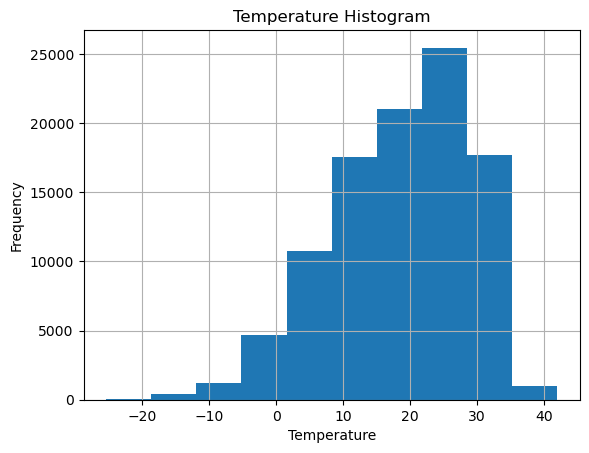

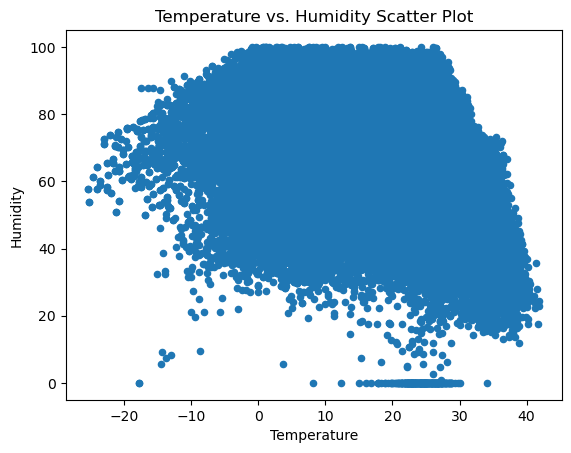

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99775 entries, 0 to 99774
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   99775 non-null  int64  
 1   Month                  99775 non-null  int64  
 2   Day                    99775 non-null  int64  
 3   Temperature            99775 non-null  float64
 4   Temp Dew Point         99775 non-null  float64
 5   Humidity               99775 non-null  float64
 6   Wind Direction         99775 non-null  object 
 7   Wind Speed             99775 non-null  float64
 8   Precipitation          99775 non-null  float64
 9   Condition              99775 non-null  object 
 10  Location               99775 non-null  object 
 11  Serialized Hemisphere  99775 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 9.1+ MB


In [5]:
file_path = 'C:/Users/ShaiS/Documents/data_science_project_weather_forcast/sorted_data_after_FACO.csv'
 # Load the data
df = pd.read_csv(file_path)
summary = analyze_data(df)

#DISCOVERED ALL HAVE MISSING VALUES:
#10  Location               99230 non-null  object 
#11  Serialized Hemisphere  99292 non-null  float64
#UPDATE: HANDLED IN THE PRE-CSVs MERGING STATE
#UPDATE: NO MISSING VALUES BEING FOUND - MISSING VALUE TREATMENT IS COMPLETED

In [13]:
#This function uses the z-score to detect and returns outliers list from the data.
#You can specify the threshold as a parameter.
def detect_outliers(column, threshold=3):
    z_scores = stats.zscore(column)
    abs_z_scores = np.abs(z_scores)
    outlier_mask = (abs_z_scores > threshold)
    outliers = column[outlier_mask]
    return outliers

def display_outliers(df, cols):
    for col in cols:
        try:
            outliers = detect_outliers(df[col])
            print(f"Outliers for {col}:")
            print(outliers)
            print("\n")
        except Exception as e:
            print(f"Exception occurred when detecting outliers for {col}: {str(e)}")
            print(f"Type: {type(e)}")
            exc_type, exc_value, exc_traceback = sys.exc_info()
            print(f"Traceback:\n{exc_traceback}")

In [14]:
display_outliers(df, ['Temperature', 'Temp Dew Point', 'Humidity', 'Wind Speed'])

#After we checked the table against the table of abnormal values, 
#we came to the understanding that these are extreme temperatures
#but which correspond to the trend in that region and period

Outliers for Temperature:
8       -13.285024
389     -13.574879
390     -12.729469
2209    -13.828502
3333    -14.707602
           ...    
90876   -12.632850
91028   -17.777778
91130   -17.777778
91294   -14.563492
95897   -13.111111
Name: Temperature, Length: 507, dtype: float64


Outliers for Temp Dew Point:
2209    -17.729469
3683    -17.638889
3701    -18.585859
3702    -18.459596
3709    -18.148148
           ...    
90874   -18.080808
91028   -17.777778
91130   -17.777778
91143   -17.777778
91185   -17.777778
Name: Temp Dew Point, Length: 747, dtype: float64


Outliers for Humidity:
562      24.630435
563      20.000000
577      20.000000
977      24.869565
985      23.456522
           ...    
91185     0.000000
91294     5.642857
91295     9.600000
95897     8.400000
99719    23.781250
Name: Humidity, Length: 673, dtype: float64


Outliers for Wind Speed:
4791     36.348977
7030     37.401155
7119     36.210240
7131     35.971013
7145     35.971013
           ...    
99134    

In [22]:

def create_season_interaction_terms(df, temp_col, season_col):
    # Create dummy variables for the season column
    dummies = pd.get_dummies(df[season_col], prefix='is_')
    df = pd.concat([df, dummies], axis=1)

    # Create interaction terms between temperature and each season
    for season in dummies.columns:
        if season != 'is_Other':
            df[f'{temp_col}_{season}'] = df[temp_col] * df[season]
            
    df = df.drop(['is__1', 'is__2', 'is__3', 'is__4'], axis=1)
    return df

def perform_feature_engineering(df):
    # Create a copy of the dataframe
    df = df.copy()
    # Create timestamp column from Year, Month, Day columns
    df.loc[:,'date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Create season column based on month
    season_dict = {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
    df.loc[:,'season'] = df['Month'].map(season_dict)

    # Create temperature difference column
    df.loc[:,'temp_diff'] = df['Temperature'].diff().fillna(df['Temperature'].median())
     
    # Removing'Precipitation' column 
    df = df.drop('Precipitation', axis=1)
    
    # Creating columns for season interaction with temp
    #df = create_season_interaction_terms(df, 'Temperature', 'season')
    
    # Pharsing the file name
    filename = "engineered_df_" + datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + ".csv"
    # Save resulting dataframe to CSV file
    df.to_csv(filename, index=True)

    return df

In [23]:
eng_df = perform_feature_engineering(df)
eng_df

,Year,Month,Day,Temperature,Temp Dew Point,Humidity,Wind Direction,Wind Speed,Condition,Location,Serialized Hemisphere,date,season,temp_diff
0,2015,1,1,3.405797,2.596618,93.695652,NNE,13.154638,Light Rain,"Ankara, Ankara, Türkiye",1,2015-01-01,1,20.101010
1,2015,1,2,2.137681,-1.473430,78.891304,NNE,15.883526,Mostly Cloudy,"Ankara, Ankara, Türkiye",1,2015-01-02,1,-1.268116
2,2015,1,3,1.608796,-1.273148,83.020833,W,8.314944,Mostly Cloudy,"Ankara, Ankara, Türkiye",1,2015-01-03,1,-0.528885
3,2015,1,4,1.481481,-1.354167,83.062500,SW,14.383512,Mostly Cloudy,"Ankara, Ankara, Türkiye",1,2015-01-04,1,-0.127315
4,2015,1,5,-0.138889,-2.858796,82.937500,NE,11.433048,Mostly Cloudy,"Ankara, Ankara, Türkiye",1,2015-01-05,1,-1.620370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,2023,2,12,11.521739,5.193237,65.152174,NNE,15.253782,Mostly Cloudy,"Tokyo, Tokyo Prefecture, Japan",4,2023-02-12,1,2.135165
99771,2023,2,13,8.586957,6.666667,87.065217,N,20.921472,Light Rain,"Tokyo, Tokyo Prefecture, Japan",4,2023-02-13,1,-2.934783
99772,2023,2,14,6.577778,-4.455556,46.820000,N,30.448788,Mostly Cloudy,"Tokyo, Tokyo Prefecture, Japan",4,2023-02-14,1,-2.009179
99773,2023,2,15,4.365079,-7.668651,41.892857,N,34.744587,Mostly Cloudy / Windy,"Tokyo, Tokyo Prefecture, Japan",4,2023-02-15,1,-2.212698


In [24]:
location_dict = {"Moscow, ID": "Russia", "Ottawa, Ontario, Canada": "Canada", "Washington, DC": "United States DC",
                 "Tokyo, Tokyo Prefecture, Japan": "Japan", "Perlin, Mecklenburg-Western Pomerania, Germany": "Germany",
                 "Ankara, Ankara, Türkiye": "Turkey", "Reykjavik Airport, Hofuoborgarsvaeoi, Iceland (BIRK)": "Iceland",
                 "Sultan Kudarat, Maguindanao, Philippines": "Philippines", "Aeritalia, Italy (LIMA)": "Italy",
                 "Canberra, Australian Capital Territory, Australia": "Australia",
                 "Ben Gurion International Airport, Israel (LLBG)": "Israel", "Brasília, Federal District, Brazil": "Brazil",
                 "Wellington, Wellington, New Zealand": "New Zealand", "Montevideo, Montevideo, Uruguay": "Uruguay",
                 "Antananarivo, Analamanga, Madagascar": "Madagascar",
                 "Charles de Gaulle Airport, Seine-et-Marne, France (LFPG)": "France", "China, MI": "China",
                 "Indira Gandhi International Airport, NCT of Delhi, India (VIDP)": "India",
                 "Port Elizabeth Airport, Eastern Cape, South Africa (FAPE)": "South Africa",
                 "Suvarnabhumi Airport, Samut Prakan, Thailand (VTBS)": "Thailand",
                 "North Jakarta, Jakarta, Indonesia": "Indonesia", "Kuala, Nghệ An, Vietnam": "Vietnam",
                 "Naypyidaw (Ela), Mandalay Region, Myanmar (VYEL)": "Myanmar",
                 "Seoul Airbase, Gyeonggi-do, South Korea (RKSM)": "South Korea", "Moxico Province, Moxico, Angola": "Mexico",
                 "Kingston, Saint Andrew, Jamaica": "Jamaica", "Port-au-Prince, Ouest, Haiti": "Haiti",
                 "Bogotá, Cundinamarca, Colombia": "Colombia", "Abu Dhabi, Abu Dhabi, United Arab Emirates": "United Arab Emirates",
                 "Flamingo (Costa Rica), Guanacaste, Costa Rica (MRFL)": "Costa Rica",
                 "Panama City, Panamá, Panama": "Panama","New York City, NY": "United States NY"}
eng_df['Location'] = eng_df['Location'].replace(location_dict)
eng_df['Location'].unique()

array(['Turkey', 'Russia', 'Canada', 'Germany', 'Iceland', 'Philippines',
       'Japan', 'United States DC', 'Italy', 'Madagascar', 'Israel',
       'Brazil', 'Australia', 'France', 'Uruguay', 'New Zealand', 'China',
       'India', 'Vietnam', 'Mexico', 'Myanmar', 'United States NY',
       'South Africa', 'South Korea', 'Thailand', 'United Arab Emirates',
       'Colombia', 'Costa Rica', 'Jamaica', 'Indonesia', 'Panama',
       'Haiti'], dtype=object)

Column Names:
Index(['Year', 'Month', 'Day', 'Temperature', 'Temp Dew Point', 'Humidity',
       'Wind Direction', 'Wind Speed', 'Condition', 'Location',
       'Serialized Hemisphere', 'date', 'season', 'temp_diff'],
      dtype='object')


Data Types:
Year                              int64
Month                             int64
Day                               int64
Temperature                     float64
Temp Dew Point                  float64
Humidity                        float64
Wind Direction                   object
Wind Speed                      float64
Condition                        object
Location                         object
Serialized Hemisphere             int64
date                     datetime64[ns]
season                            int64
temp_diff                       float64
dtype: object


First Few Rows:
   Year  Month  Day  Temperature  Temp Dew Point   Humidity Wind Direction  \
0  2015      1    1     3.405797        2.596618  93.695652            NNE  

C:\Users\ShaiS\AppData\Local\Temp\ipykernel_2548\141196644.py:26: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


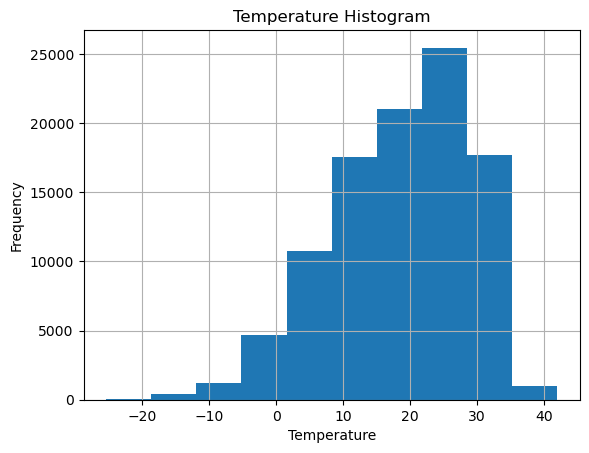

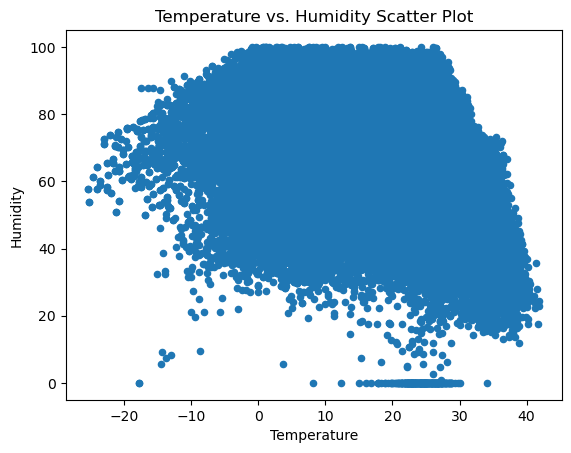

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99775 entries, 0 to 99774
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   99775 non-null  int64         
 1   Month                  99775 non-null  int64         
 2   Day                    99775 non-null  int64         
 3   Temperature            99775 non-null  float64       
 4   Temp Dew Point         99775 non-null  float64       
 5   Humidity               99775 non-null  float64       
 6   Wind Direction         99775 non-null  object        
 7   Wind Speed             99775 non-null  float64       
 8   Condition              99775 non-null  object        
 9   Location               99775 non-null  object        
 10  Serialized Hemisphere  99775 non-null  int64         
 11  date                   99775 non-null  datetime64[ns]
 12  season                 99775 non-null  int64         
 13  t

C:\Users\ShaiS\AppData\Local\Temp\ipykernel_2548\141196644.py:53: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  "Descriptive Statistics": df.describe(include='all').to_dict(),


In [26]:
summary = analyze_data(eng_df)

In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Location' column
eng_df['Location'] = le.fit_transform(eng_df['Location'])
eng_df['Condition'] = le.fit_transform(eng_df['Condition'])
eng_df['Wind Direction'] = le.fit_transform(eng_df['Wind Direction'])

# Serialize the 'Location_labels' column to a pickle file
#eng_df['Location'].to_pickle('location_labels.pkl')

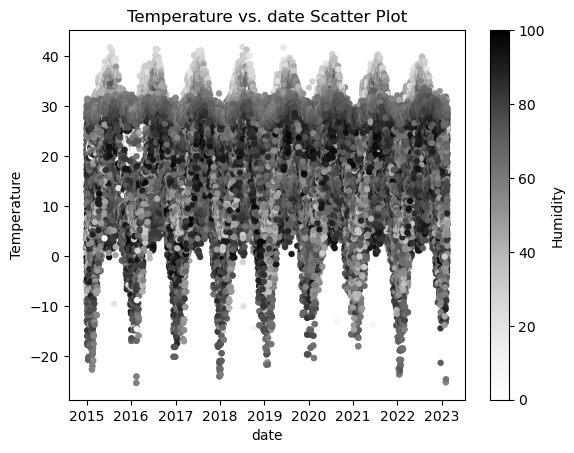

In [37]:
# Create scatter plot of temperature and humidity values
eng_df.plot.scatter(x='date', y='Temperature', c='Humidity', linewidths=0.1)
plt.title("Temperature vs. date Scatter Plot")
plt.show()

In [39]:
# specify the data type of the columns variables as nominals

eng_df['Wind Direction'] = pd.Categorical(eng_df['Wind Direction'], ordered=False)
eng_df['Condition'] = pd.Categorical(eng_df['Condition'], ordered=False)
eng_df['Location'] = pd.Categorical(eng_df['Location'], ordered=False)
eng_df['season'] = pd.Categorical(eng_df['season'], ordered=False)

# specify the data type of the columns variables as ordinals
eng_df['Year'] = pd.Categorical(eng_df['Year'], ordered=True)
eng_df['Month'] = pd.Categorical(eng_df['Month'], ordered=True)
eng_df['Day'] = pd.Categorical(eng_df['Day'], ordered=True)



In [40]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99775 entries, 0 to 99774
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   99775 non-null  category      
 1   Month                  99775 non-null  category      
 2   Day                    99775 non-null  category      
 3   Temperature            99775 non-null  float64       
 4   Temp Dew Point         99775 non-null  float64       
 5   Humidity               99775 non-null  float64       
 6   Wind Direction         99775 non-null  category      
 7   Wind Speed             99775 non-null  float64       
 8   Condition              99775 non-null  category      
 9   Location               99775 non-null  category      
 10  Serialized Hemisphere  99775 non-null  int64         
 11  date                   99775 non-null  datetime64[ns]
 12  season                 99775 non-null  category      
 13  t

In [42]:
# select the numerical columns
num_cols = ['Temperature', 'Temp Dew Point', 'Humidity', 'Wind Speed', 'temp_diff']

# create a scaler object
scaler = MinMaxScaler()

# normalize the data
eng_df[num_cols] = scaler.fit_transform(eng_df[num_cols])
eng_df

,Year,Month,Day,Temperature,Temp Dew Point,Humidity,Wind Direction,Wind Speed,Condition,Location,Serialized Hemisphere,date,season,temp_diff
0,2015,1,1,0.427614,0.554718,0.936957,NNE,0.060548,Light Rain,Turkey,1,2015-01-01,1,0.710811
1,2015,1,2,0.408765,0.489307,0.788913,NNE,0.073108,Mostly Cloudy,Turkey,1,2015-01-02,1,0.478191
2,2015,1,3,0.400903,0.492526,0.830208,W,0.038272,Mostly Cloudy,Turkey,1,2015-01-03,1,0.486238
3,2015,1,4,0.399011,0.491224,0.830625,SW,0.066204,Mostly Cloudy,Turkey,1,2015-01-04,1,0.490610
4,2015,1,5,0.374925,0.467042,0.829375,NE,0.052623,Mostly Cloudy,Turkey,1,2015-01-05,1,0.474357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,2023,2,12,0.548251,0.596450,0.651522,NNE,0.070209,Mostly Cloudy,Japan,4,2023-02-12,1,0.515239
99771,2023,2,13,0.504628,0.620130,0.870652,N,0.096296,Light Rain,Japan,4,2023-02-13,1,0.460048
99772,2023,2,14,0.474763,0.441380,0.468200,N,0.140148,Mostly Cloudy,Japan,4,2023-02-14,1,0.470124
99773,2023,2,15,0.441873,0.389741,0.418929,N,0.159921,Mostly Cloudy / Windy,Japan,4,2023-02-15,1,0.467909


In [43]:
# Get the column you want to move
col_to_move = eng_df.pop('Temperature')

# Add the column to the end of the DataFrame
eng_df['Temperature'] = col_to_move

eng_df

,Year,Month,Day,Temp Dew Point,Humidity,Wind Direction,Wind Speed,Condition,Location,Serialized Hemisphere,date,season,temp_diff,Temperature
0,2015,1,1,0.554718,0.936957,NNE,0.060548,Light Rain,Turkey,1,2015-01-01,1,0.710811,0.427614
1,2015,1,2,0.489307,0.788913,NNE,0.073108,Mostly Cloudy,Turkey,1,2015-01-02,1,0.478191,0.408765
2,2015,1,3,0.492526,0.830208,W,0.038272,Mostly Cloudy,Turkey,1,2015-01-03,1,0.486238,0.400903
3,2015,1,4,0.491224,0.830625,SW,0.066204,Mostly Cloudy,Turkey,1,2015-01-04,1,0.490610,0.399011
4,2015,1,5,0.467042,0.829375,NE,0.052623,Mostly Cloudy,Turkey,1,2015-01-05,1,0.474357,0.374925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,2023,2,12,0.596450,0.651522,NNE,0.070209,Mostly Cloudy,Japan,4,2023-02-12,1,0.515239,0.548251
99771,2023,2,13,0.620130,0.870652,N,0.096296,Light Rain,Japan,4,2023-02-13,1,0.460048,0.504628
99772,2023,2,14,0.441380,0.468200,N,0.140148,Mostly Cloudy,Japan,4,2023-02-14,1,0.470124,0.474763
99773,2023,2,15,0.389741,0.418929,N,0.159921,Mostly Cloudy / Windy,Japan,4,2023-02-15,1,0.467909,0.441873


In [64]:
eng_df

,Year,Month,Day,Temp Dew Point,Humidity,Wind Direction,Wind Speed,Condition,Location,Serialized Hemisphere,date,season,temp_diff,Temperature,Northern Hemisphere,Southern Hemisphere,Eastern Hemisphere,Western Hemisphere
0,2015,1,1,0.554718,0.936957,6,0.060548,21,26,1,2015-01-01,1,0.710811,0.427614,1,0,1,0
1,2015,1,2,0.489307,0.788913,6,0.073108,32,26,1,2015-01-02,1,0.478191,0.408765,1,0,1,0
2,2015,1,3,0.492526,0.830208,15,0.038272,32,26,1,2015-01-03,1,0.486238,0.400903,1,0,1,0
3,2015,1,4,0.491224,0.830625,13,0.066204,32,26,1,2015-01-04,1,0.490610,0.399011,1,0,1,0
4,2015,1,5,0.467042,0.829375,5,0.052623,32,26,1,2015-01-05,1,0.474357,0.374925,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,2023,2,12,0.596450,0.651522,6,0.070209,32,15,4,2023-02-12,1,0.515239,0.548251,1,0,1,0
99771,2023,2,13,0.620130,0.870652,4,0.096296,21,15,4,2023-02-13,1,0.460048,0.504628,1,0,1,0
99772,2023,2,14,0.441380,0.468200,4,0.140148,32,15,4,2023-02-14,1,0.470124,0.474763,1,0,1,0
99773,2023,2,15,0.389741,0.418929,4,0.159921,33,15,4,2023-02-15,1,0.467909,0.441873,1,0,1,0


In [81]:
mch_df= eng_df.copy()

TRAINING_FEATURES = mch_df.columns[~mch_df.columns.isin(['Temperature','Humidity', 'season', 'date'])]
TARGET_FEATURE    = 'Temperature'

X = mch_df[TRAINING_FEATURES]
y = mch_df[TARGET_FEATURE]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=45)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))


print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #99775
Number of training samples: #9977
Number of test samples: #89798

Target distribution in original dataset:
0.806399    325
0.814657    312
0.798141    268
0.822915    247
0.789883    220
           ... 
0.586236      1
0.663803      1
0.718115      1
0.767214      1
0.704633      1
Name: Temperature, Length: 22766, dtype: int64

Target distribution in the training set:
0.822915    27
0.811904    25
0.806399    24
0.798141    24
0.789883    21
            ..
0.573677     1
0.618237     1
0.374872     1
0.668768     1
0.678746     1
Name: Temperature, Length: 6066, dtype: int64

Target distribution in the test set:
0.806399    301
0.814657    294
0.798141    244
0.822915    220
0.789883    199
           ... 
0.584575      1
0.515080      1
0.659622      1
0.586006      1
0.798927      1
Name: Temperature, Length: 21732, dtype: int64


In [83]:
#Determine the type of ML for our model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#Building model 
linear_model.fit(X_train, y_train) 

#Making predictions to test the model on test data
y_pred_linear_model = linear_model.predict(X_test) 

#Assessment by RMSE metric of the accuracy between our model and the real values
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred_linear_model))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred_linear_model))

#Calculates the accuracy score of our model:
r2_score(y_test,y_pred_linear_model)

Coefficients: [-2.02094068e-03 -4.00050365e-04  8.16830633e-05  8.09198113e-01
 -2.05344187e-04 -4.10316717e-02 -8.96447704e-04  9.70570376e-04
  1.02891665e-02  2.51864063e-01 -4.99938439e-03  4.99938439e-03
  1.86700320e-03 -1.86700320e-03]
Intercept: 4.01631428516613
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.84


0.8354946638146069

In [ ]:
# 0.8375131911033843

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
model = RandomForestRegressor(n_estimators=100, random_state=45).fit(X, y)
print("Accuracy:", model.score(X_test, y_test))

In [ ]:
eng_df.iloc[29710:29713]

In [ ]:
eng_df.describe()

In [ ]:
prediction1 = [2023, 2, 22, 7.8, 14, 22.530816, 8, 12, 2, 1, 0.492707, 0.420320, 0.313725, 0.247532, 0.306411]

# create a DataFrame from prediction1
df = pd.DataFrame(prediction1).T

# instantiate the scaler
scaler = StandardScaler()

# fit and transform the data
prediction2 = scaler.fit_transform(df)
prediction2_list = prediction2.tolist()[0]
for var in prediction2_list: 
    print("%f" % var)

In [ ]:

prediction3 = model.predict(prediction2)#56.94##13.9
# Make prediction on normalized data
prediction3 = model.predict(prediction2)
print("Predicted rate:", float(prediction3))

# Reverse the normalization
prediction3_rescaled = scaler.inverse_transform(prediction3.reshape(1, -1))

# Print the original data
original_data = prediction3_rescaled.tolist()[0]
print("Original data:", original_data)

In [3]:
corr_mat =calculate_correlations(eng_df)

# assume corr_matrix is the correlation matrix
# sns.heatmap(corr_mat, annot=True, linewidth=.5, cmap='coolwarm')
#sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.heatmap(corr_mat, annot=True, linewidths=1.5, ax=ax, cmap='coolwarm', annot_kws={"fontsize":11})

plt.show()

NameError: name 'eng_df' is not defined

In [54]:
def add_hemisphere_dummies(df, csv_file_path):
    hemisphere_df = pd.read_csv(csv_file_path)
    hemisphere_df.set_index('Location', inplace=True)
    hemisphere_cols = ['Northern Hemisphere', 'Southern Hemisphere', 'Eastern Hemisphere', 'Western Hemisphere']
    for col in hemisphere_cols:
        df[col] = 0
    for i, row in df.iterrows():
        location = row['Location']
        if location in hemisphere_df.index:
            hemispheres = hemisphere_df.loc[location, hemisphere_cols]
            for col in hemisphere_cols:
                df.at[i, col] = hemispheres[col]
    return df

In [56]:
eng_df = add_hemisphere_dummies(eng_df,"hemisphere_df.csv")

In [59]:
eng_df.to_csv("df_included_hemisphere_dummies.csv")

In [5]:
import matplotlib
matplotlib.use('Agg')

def plot_data1(df):
    # Line chart of temperature by city
    plt.figure(figsize=(16, 9))
    sns.lineplot(x='date', y='Temperature', hue='Location', data=df)
    plt.title('Average Temperature by City over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.savefig('Line_chart_of_temperature_by_city.png', dpi=300)
    plt.clf()
    
    # Line chart of temperature by hemisphere
    sns.lineplot(x='date', y='Temperature', hue='Serialized Hemisphere', data=df)
    plt.title('Average Temperature by Hemisphere over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.savefig('Line_chart_of_temperature_by_hemisphere.png', dpi=300)
    plt.clf()

   # Heat map of temperature by city and hemisphere
    heatmap_df = eng_df.pivot_table(index='date', columns='Location', values='Temperature', aggfunc='mean')
    sns.heatmap(heatmap_df, cmap='coolwarm')
    plt.title('Temperature Variations across Cities in Different Hemispheres')
    plt.xlabel('Serialized Hemisphere')
    plt.ylabel('Location')
    plt.savefig('Heat_map_of_temperature_by_city_and_hemisphere.png', dpi=300)
    plt.clf()
    # Export the heatmap data to a CSV file
    heatmap_df.to_csv('heatmap_data.csv')
    
    

    # Box plot of temperature by hemisphere
    sns.boxplot(x='Serialized Hemisphere', y='Temperature', data=df)
    plt.title('Temperature Distributions by Hemisphere')
    plt.xlabel('Serialized Hemisphere')
    plt.ylabel('Temperature')
    plt.savefig('Box_plot_of_temperature_Variations_across_Cities_in_Different_Hemispheres.png', dpi=300)
    plt.clf()
    
    
    # Scatter plot of temperature by time of year
    df['Month'] = df['date'].dt.month
    sns.scatterplot(x='Month', y='Temperature', data=df)
    plt.title('Temperature vs. Time of Year')
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.savefig('Scatter_plot_of_temperature_by_time_of_year.png', dpi=300)
    plt.clf()

In [ ]:

plot_data1(eng_df)

In [2]:
#This function calculates the correlation matrix for the data.
#You can use this to identify any strong relationships between variables.
def calculate_correlations(df):
    corr_matrix = df.corr()
    return corr_matrix

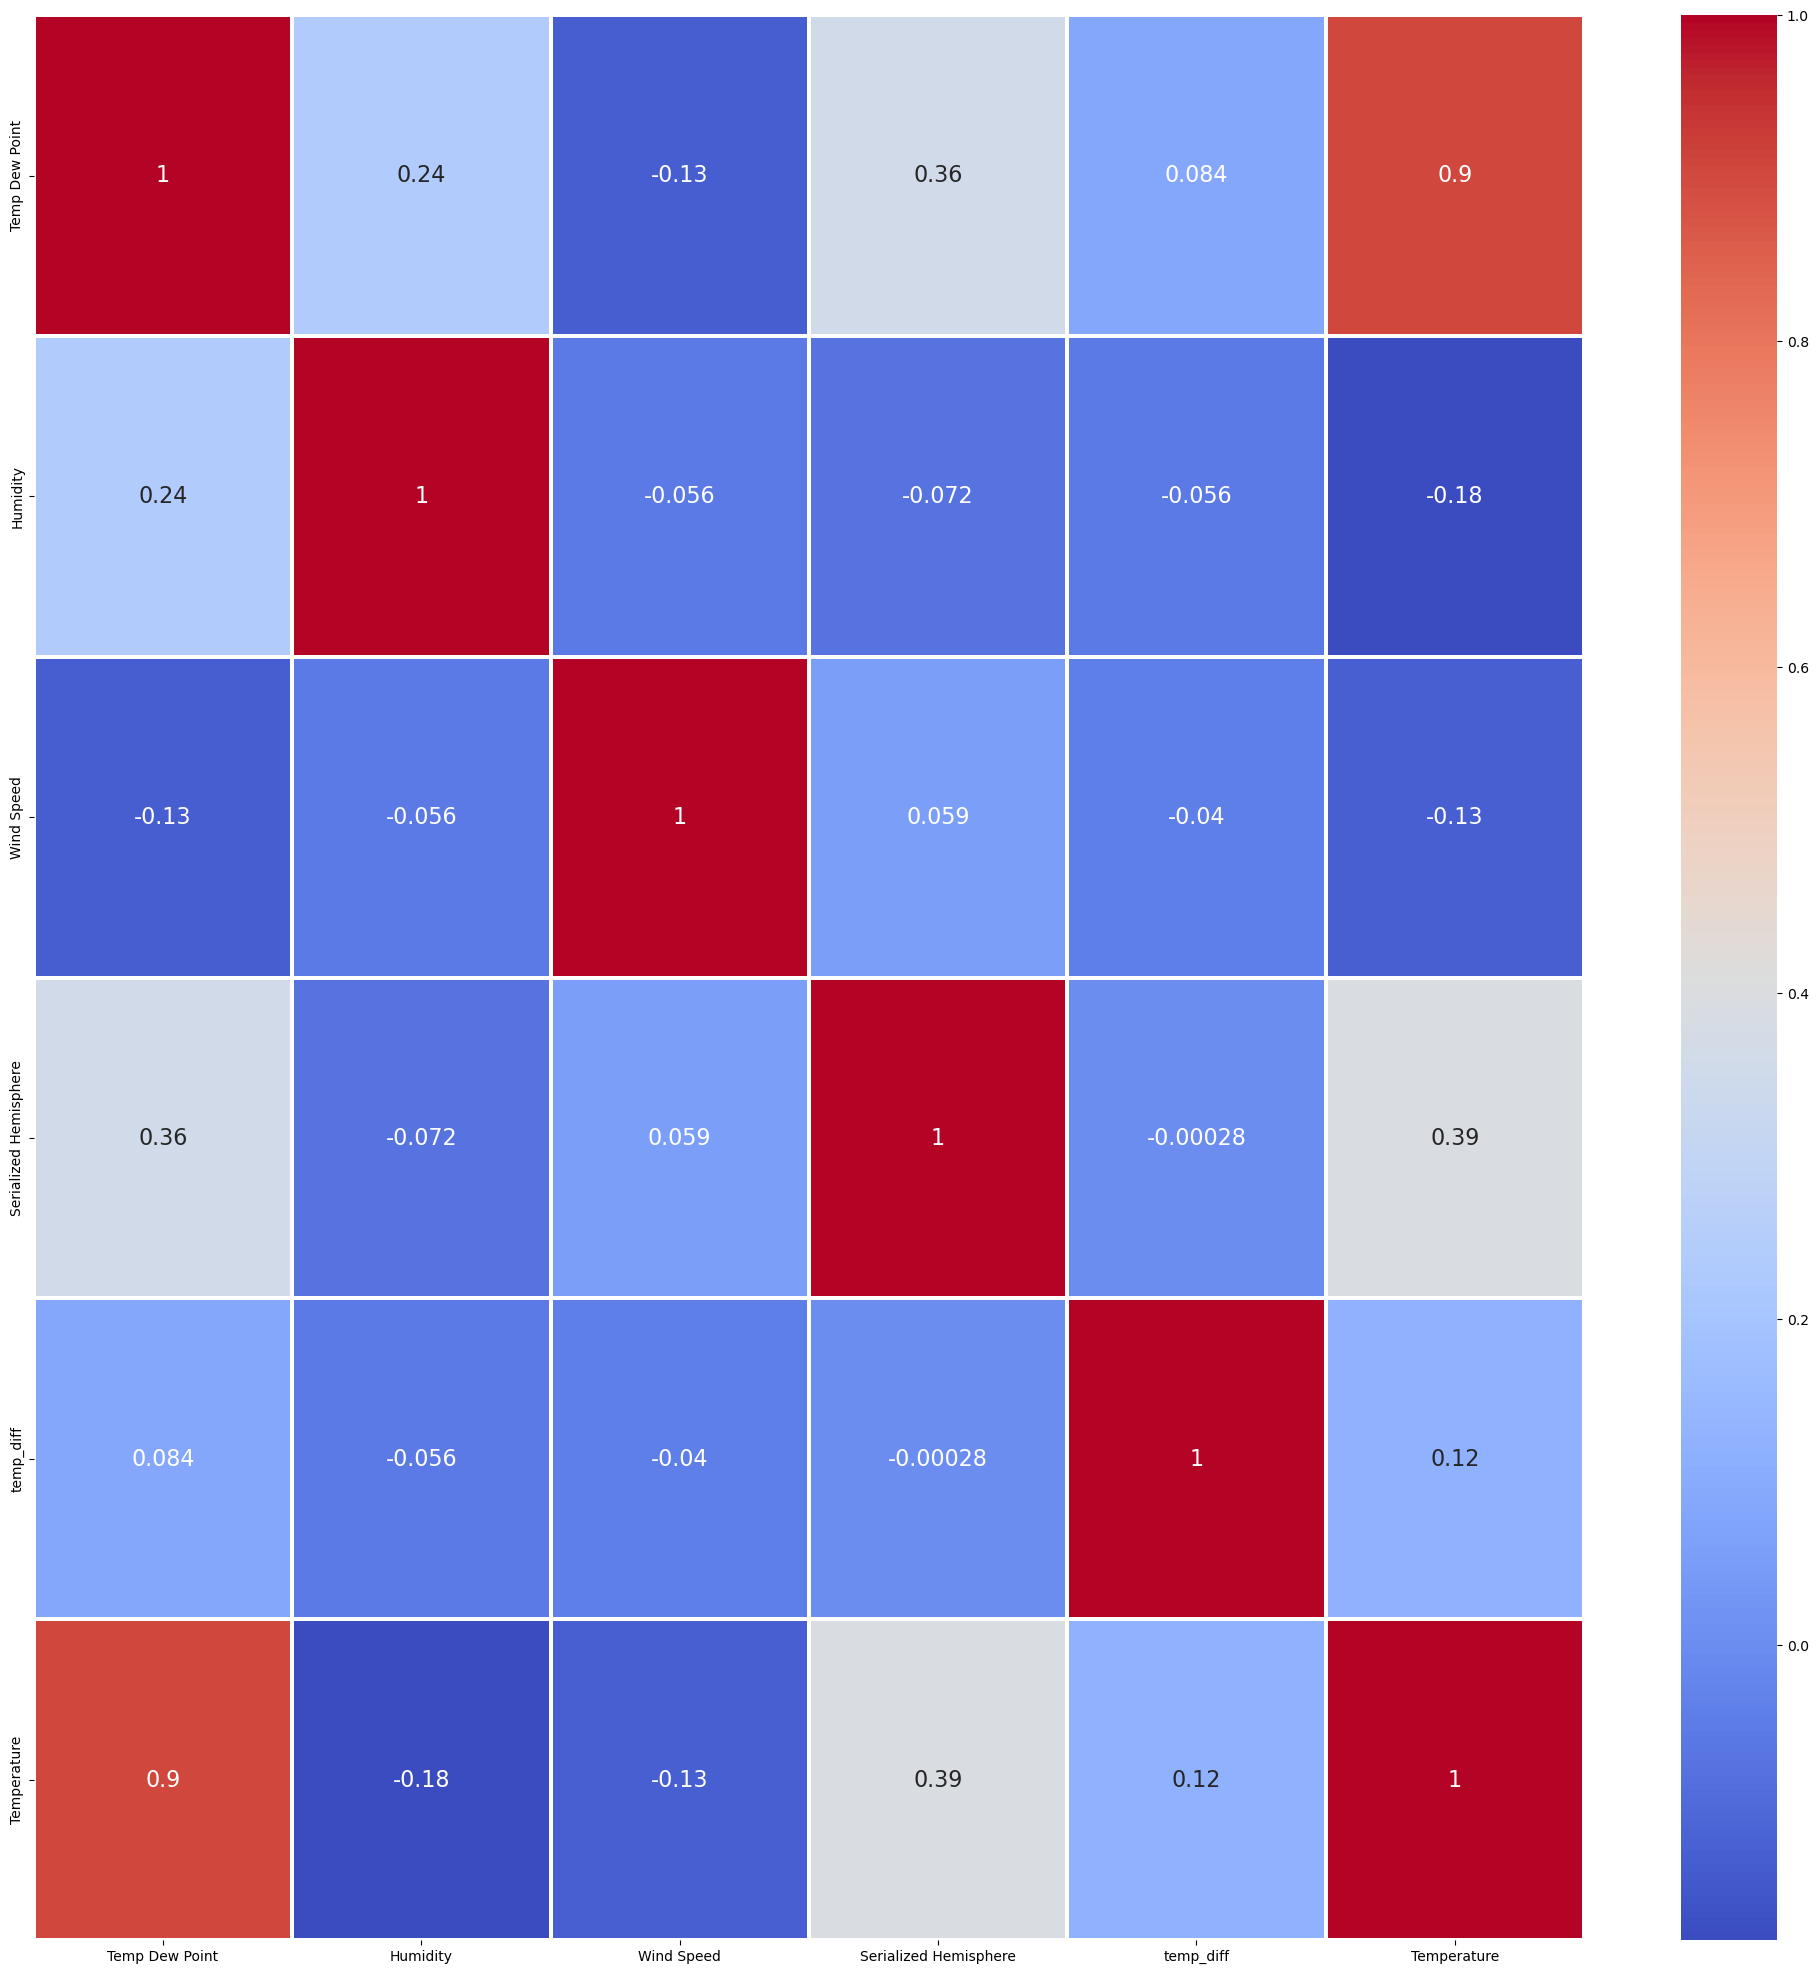

In [48]:
## corr_mat =calculate_correlations(eng_df)

# assume corr_matrix is the correlation matrix
# sns.heatmap(corr_mat, annot=True, linewidth=.5, cmap='coolwarm')
#sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
fig, ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.heatmap(corr_mat, annot=True, linewidths=1.5, ax=ax, cmap='coolwarm', annot_kws={"fontsize":16})

plt.show()

#conclutions insights:
#Temperature has a strong positive correlation with Dew Point, indicating that the higher the dew point, the higher the temperature is likely to be.

#Temperature has a moderate positive correlation with Serialized Hemisphere, indicating that temperatures are generally higher in the southern hemisphere compared to the northern hemisphere.

#Temperature has a weak positive correlation with Month, indicating that temperature tends to be slightly higher during the summer months.

#Temperature has a weak negative correlation with Year, indicating that temperature tends to decrease slightly over time.

#Humidity has a weak positive correlation with Dew Point, indicating that as dew point increases, humidity tends to increase as well.

In [ ]:
corr_mat

In [ ]:
### IN CASE OF NEED:

def normalize1(df):
    normalized_df = (df - df.mean()) / df.std()
    return normalized_df

def standardize(df):
    standardized_df = (df - df.min()) / (df.max() - df.min())
    return standardized_df

def log_transform(df):
    transformed_df = np.log(df)
    return transformed_df